## Практика 8


### Задание 1. Определение коэффициента корреляции

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [22]:
street = np.array([80, 98, 75, 91, 78])
garage = np.array([100, 82, 105, 89, 102])
np.corrcoef(street, garage)[0,1]

-0.9999999999999998

### Задание 2. Построение диаграммы рассеяния

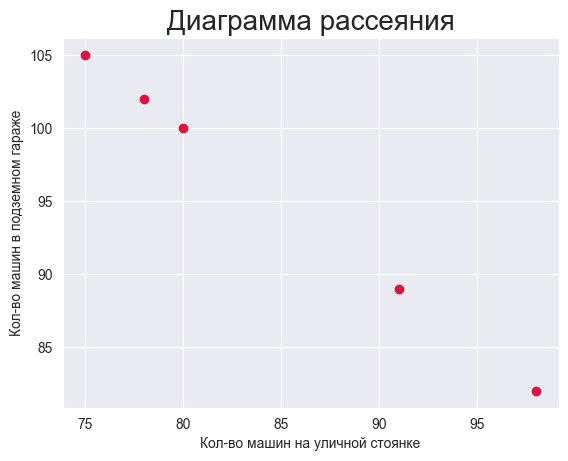

In [23]:
plt.grid(True)
plt.title('Диаграмма рассеяния', fontsize=20)
plt.xlabel('Кол-во машин на уличной стоянке')
plt.ylabel('Кол-во машин в подземном гараже')
plt.scatter(street, garage, color='crimson')
plt.show()

### Задание 3. Загрузка данных из файла bitcoin.csv

In [24]:
data = pd.read_csv('bitcoin.csv')
data.drop(data.columns[0], axis=1, inplace=True)
data.head()

,time,high,low,open,volumefrom,volumeto,close
0,2015-12-20,462.76,431.10,461.20,121531.64,54316484.95,441.78
1,2015-12-21,445.54,423.99,441.78,121990.88,53270215.60,437.59
2,2015-12-22,443.22,433.25,437.59,65785.54,28845536.39,437.03
3,2015-12-23,444.78,434.28,437.03,63247.04,27877349.10,442.43
4,2015-12-24,460.62,441.76,442.43,79604.01,36096662.15,452.98


### Задание 4. Скрытие последних 14projection дней

In [25]:
projection = 14
data['predict'] = data['close'][:-projection]
data

,time,high,low,open,volumefrom,volumeto,close,predict
0,2015-12-20,462.76,431.10,461.20,121531.64,5.431648e+07,441.78,441.78
1,2015-12-21,445.54,423.99,441.78,121990.88,5.327022e+07,437.59,437.59
2,2015-12-22,443.22,433.25,437.59,65785.54,2.884554e+07,437.03,437.03
3,2015-12-23,444.78,434.28,437.03,63247.04,2.787735e+07,442.43,442.43
4,2015-12-24,460.62,441.76,442.43,79604.01,3.609666e+07,452.98,452.98
...,...,...,...,...,...,...,...,...
1996,2021-06-07,36790.39,33367.12,35798.57,52209.55,1.850311e+09,33582.86,NaN
1997,2021-06-08,34061.09,31034.35,33582.86,88483.79,2.890313e+09,33409.38,NaN
1998,2021-06-09,37528.42,32435.18,33409.38,92280.57,3.249554e+09,37391.58,NaN
1999,2021-06-10,38387.20,35821.05,37391.58,63052.49,2.338112e+09,36680.78,NaN


### Задание 5. Предсказывание стоимости криптовалюты за последние 14projection дней с помощью линейной регрессии.

<AxesSubplot: >

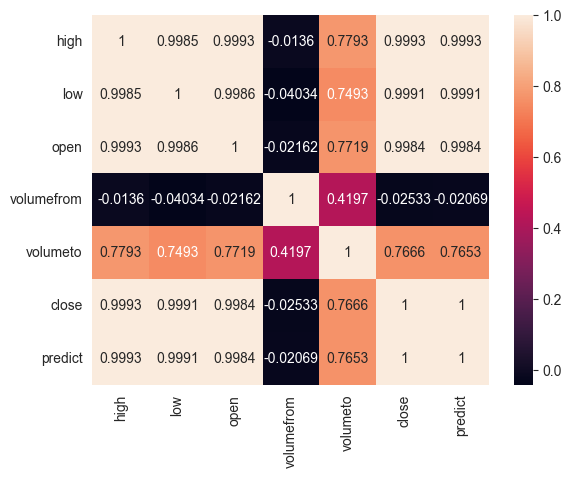

In [26]:
sns.heatmap(data.corr(), annot = True, fmt='.4g')

In [27]:
x_fit = np.array(data.high).reshape(-1, 1)[:-projection]
y_fit = np.array(data.predict)[:-projection]
x_test = np.array(data.high[-projection:]).reshape(-1, 1)
regression = LinearRegression()
regression.fit(x_fit, y_fit)
y_test = regression.predict(x_test)

print(f'Истинно: {np.array(data.close[-projection:])}\nПредсказано: {y_test}')

Истинно: [34611.58 35662.59 37290.83 36683.51 37576.98 39229.66 36861.5  35538.4
 35798.57 33582.86 33409.38 37391.58 36680.78 36843.33]
Предсказано: [36146.53036024 35347.50114068 36345.63913387 36730.2956023
 37035.19240642 38252.18549791 38049.91150458 36731.81529493
 35320.58225398 35646.3772517  33004.53196299 36360.75862364
 37192.02081432 36493.78496666]


### Задание 6. Угол наклона и y-перехват

In [28]:
print(f'Угол наклона: {regression.coef_[0]}\ty-перехват: {regression.intercept_}')

Угол наклона: 0.9679570910894065	y-перехват: 34.85836725506306


### Задание 7. Построение диаграммы

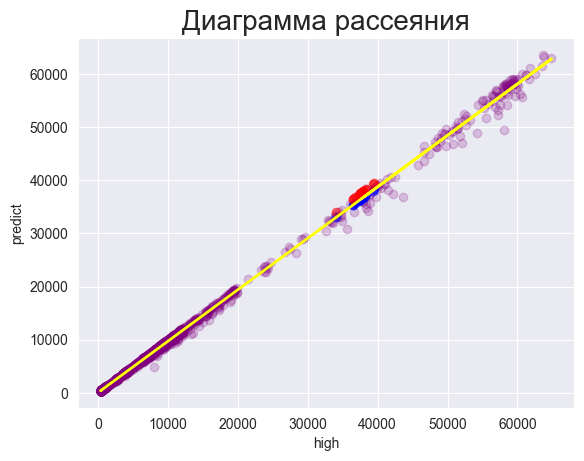

In [29]:
x = np.array(data.high).reshape(-1, 1)

plt.grid(True)
plt.title('Диаграмма рассеяния', fontsize=20)
plt.xlabel('high')
plt.ylabel('predict')
plt.scatter(x_fit, y_fit, color='purple', alpha=0.2)
plt.scatter(x_test, y_test, color='blue', alpha=0.5)
plt.scatter(x_test, np.array(data.high[-projection:]), color='red', alpha=0.5)
plt.plot(x, regression.predict(x), color = 'yellow', linewidth = 2)
plt.show()

### Задание 8. Загрузка данных из housePrice.csv

In [30]:
data = pd.read_csv('housePrice.csv')
data.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 146.2+ KB


### Задание 9. Предобработка данных

In [32]:
data.describe()

,Room,Price,Price(USD)
count,3479.000000,3.479000e+03,3.479000e+03
mean,2.079908,5.359023e+09,1.786341e+05
std,0.758275,8.099935e+09,2.699978e+05
min,0.000000,3.600000e+06,1.200000e+02
25%,2.000000,1.418250e+09,4.727500e+04
50%,2.000000,2.900000e+09,9.666667e+04
75%,2.000000,6.000000e+09,2.000000e+05
max,5.000000,9.240000e+10,3.080000e+06


In [33]:
data[data.duplicated()]

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
55,61,1,True,True,False,Punak,2.030000e+09,67666.67
78,74,2,True,True,True,Amirieh,1.700000e+09,56666.67
79,88,3,False,False,True,Parand,5.600000e+08,18666.67
80,63,1,True,True,True,Punak,2.150000e+09,71666.67
81,114,3,True,True,True,Sattarkhan,5.500000e+09,183333.33
...,...,...,...,...,...,...,...,...
3449,80,2,True,True,True,Punak,3.760000e+09,125333.33
3451,88,2,True,True,True,Central Janatabad,4.000000e+09,133333.33
3459,80,2,True,True,True,Ostad Moein,2.250000e+09,75000.00
3461,55,1,True,True,True,Punak,2.300000e+09,76666.67


In [34]:
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)
data = data.loc[data['Room'] > 0]
data['Area'] = (data['Area'].str.replace(',', '')).astype('int64')
data = data[data['Area'] < 300]
data.reset_index(drop=True, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3163 non-null   int64  
 1   Room        3163 non-null   int64  
 2   Parking     3163 non-null   bool   
 3   Warehouse   3163 non-null   bool   
 4   Elevator    3163 non-null   bool   
 5   Address     3163 non-null   object 
 6   Price       3163 non-null   float64
 7   Price(USD)  3163 non-null   float64
dtypes: bool(3), float64(2), int64(2), object(1)
memory usage: 132.9+ KB


### Задание 10. Реализация линейной регрессии вручную

In [35]:
projection = 30
data['predict'] = data['Price(USD)'][:-projection]

In [36]:
x_fit = np.array(data.Area)[:-projection]
y_fit = np.array(data.predict)[:-projection]
x_test = np.array(data.Area)[-projection:]

In [37]:
n = np.size(x_fit)

m_x = np.mean(x_fit)
m_y = np.mean(y_fit)

SS_xy = np.sum(y_fit * x_fit) - n * m_x * m_y
SS_xx = np.sum(x_fit * x_fit) - n * m_x * m_x

b1 = SS_xy / SS_xx
b0 = m_y - b1 * m_x

y_test = b0 + b1 * x_test

### Задание 11. Угол наклона и y-перехват

In [38]:
print(f'Угол наклона: {b1}\ty-перехват: {b0}')

Угол наклона: 3524.5576329644987	y-перехват: -192155.82353220726


In [39]:
np.array(data.Area)[-projection:]

array([120, 137,  92,  45,  68,  85, 118, 180,  60,  80,  86, 123, 148,
        58,  60, 133,  94,  68,  61,  75,  81,  74,  97,  94, 113,  63,
        86,  83, 105,  82], dtype=int64)

### Задание 12. Построние диаграммы

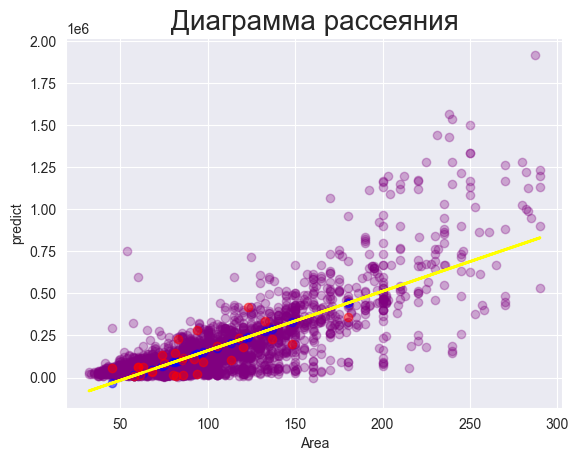

In [40]:
plt.grid(True)
plt.title('Диаграмма рассеяния', fontsize=20)
plt.xlabel('Area')
plt.ylabel('predict')
plt.scatter(x_fit, y_fit, color='purple', alpha=0.3)
plt.scatter(x_test, y_test, color='blue', alpha=0.5)
plt.scatter(x_test, np.array(data['Price(USD)'])[-projection:], color='red', alpha=0.5)
plt.plot(x_fit, b0 + b1 * x_fit, color = 'yellow', linewidth = 2)
plt.show()